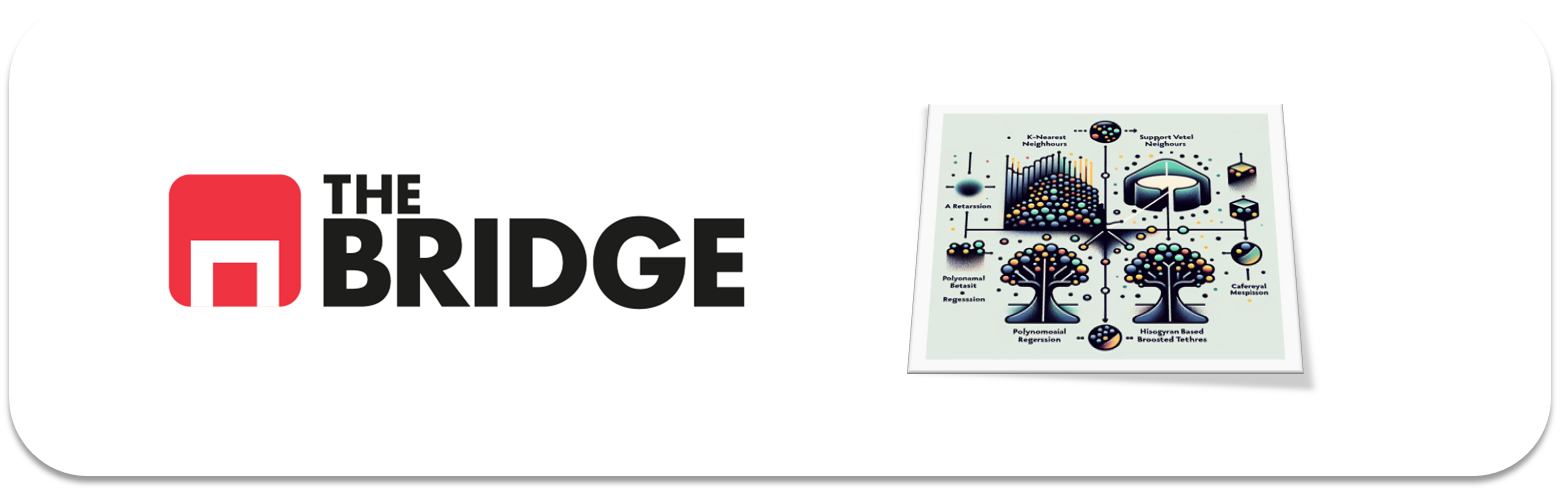

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import funciones_toolbox as ft
import bootcampviztools as bt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv", sep=",") 
df

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                     0                              0.081892   37   
1                     0                              0.023413   74   
2                     0                              0.000000   43   
3                     0                              0.492754   44   
4                     0                              1.000000   63   
...                 ...                                   ...  ...   
12532                 0                              0.197116   59   
12533                 0                              0.036726   62   
12534                 0                              0.120313   49   
12535                 0                              0.252566   63   
12536                 0                              0.000000   40   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                         0   0.070709         5656.0   
1                                         0   0.209197         4870.0   
2                                         0   0.080784         5000.0   
3                                         0   0.412735         7333.0   
4                                         0   0.000000         8333.0   
...                                     ...        ...            ...   
12532                                     0   0.290216         5140.0   
12533                                     0   0.884985         5833.0   
12534                                     0   0.577676         6333.0   
12535                                     0   0.037640        14000.0   
12536                                     0   0.455357         3583.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                   12                        1   
1                                    9                        0   
2                                    2                        0   
3                                    4                        0   
4                                    3                        0   
...                                ...                      ...   
12532                                6                        0   
12533                               12                        0   
12534                                7                        0   
12535                                9                        0   
12536                                7                        0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                 0                                     0   
1                                 1                                     0   
2                                 0                                     0   
3                                 2                                     0   
4                                 0                                     0   
...                             ...                                   ...   
12532                             1                                     0   
12533                             1                                     0   
12534                             2                                     0   
12535                             0                                     0   
12536                             2                                     0   

       NumberOfDependents  
0                     0.0  
1                     0.0  
2                     2.0  
3                     3.0  
4                     1.0  
...                   ...  
12532                 0.0  
12533                 0.0  
12534                 2.0  
12535                 1.0  
12536                 1.0  

[12537 rows x 11 columns]

#### Ficha del dataset

| Variable | Descripción| Tipo |
|---------|-------------------------------|------|
| **SeriousDlqin2yrs** | Indica si la persona tuvo un impago grave en los próximos 2 años (0/1). | Binaria (objetivo) |
| **RevolvingUtilizationOfUnsecuredLines** | Porcentaje de uso del crédito no asegurado respecto al límite disponible. | Numérica continua |
| **age** | Edad del solicitante en años. | Numérica discreta |
| **NumberOfTime30-59DaysPastDueNotWorse** | Veces con retrasos de pago de 30–59 días. | Numérica discreta |
| **DebtRatio** | Proporción entre gastos mensuales de deuda e ingresos mensuales. | Numérica continua |
| **MonthlyIncome** | Ingreso mensual declarado. | Numérica continua |
| **NumberOfOpenCreditLinesAndLoans** | Número total de créditos y préstamos abiertos. | Numérica discreta |
| **NumberOfTimes90DaysLate** | Veces con retrasos de pago de 90 días o más. | Numérica discreta |
| **NumberRealEstateLoansOrLines** | Número de préstamos o líneas de crédito inmobiliarias. | Numérica discreta |
| **NumberOfTime60-89DaysPastDueNotWorse** | Veces con retrasos de pago de 60–89 días. | Numérica discreta |
| **NumberOfDependents** | Número de personas dependientes económicamente. | Numérica discreta |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
for col in df.columns:
    print(f"\n--- VALUE COUNTS: {col} ---")
    print(df[col].value_counts(dropna=False))


--- VALUE COUNTS: SeriousDlqin2yrs ---
SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

--- VALUE COUNTS: RevolvingUtilizationOfUnsecuredLines ---
RevolvingUtilizationOfUnsecuredLines
0.000000    878
1.000000    875
0.035839      2
0.953488      2
1.086379      2
           ... 
0.860370      1
0.245543      1
0.068484      1
0.161741      1
0.116165      1
Name: count, Length: 10764, dtype: int64

--- VALUE COUNTS: age ---
age
47     347
49     325
48     324
50     304
53     302
      ... 
95       7
94       3
97       1
96       1
101      1
Name: count, Length: 78, dtype: int64

--- VALUE COUNTS: NumberOfTime30-59DaysPastDueNotWorse ---
NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64

--- VALUE COUNTS: DebtRatio ---
DebtRatio
0.000000    430
4.000000     24
1.000000     19
2.000000     17
3.000000     16
           ... 
0.095587 

In [5]:
df.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10764
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11547
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

In [6]:
ft.tipifica_variables(df,8,0.5)

nombre_variable      tipo_sugerido
0                       SeriousDlqin2yrs            Binaria
1   RevolvingUtilizationOfUnsecuredLines  Numerica Continua
2                                    age  Numerica Discreta
3   NumberOfTime30-59DaysPastDueNotWorse  Numerica Discreta
4                              DebtRatio  Numerica Continua
5                          MonthlyIncome  Numerica Discreta
6        NumberOfOpenCreditLinesAndLoans  Numerica Discreta
7                NumberOfTimes90DaysLate  Numerica Discreta
8           NumberRealEstateLoansOrLines  Numerica Discreta
9   NumberOfTime60-89DaysPastDueNotWorse  Numerica Discreta
10                    NumberOfDependents  Numerica Discreta

In [7]:
num_features = df.columns.drop("SeriousDlqin2yrs").to_list()

In [8]:
target = "SeriousDlqin2yrs"

In [9]:
num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [10]:
target

'SeriousDlqin2yrs'

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

- La variable target es SeriousDlqin2yrs
- Es binaria, por tanto es un problema de clasificación binaria

### #1.3
Pinta la distribución de frecuencias del target y coméntala

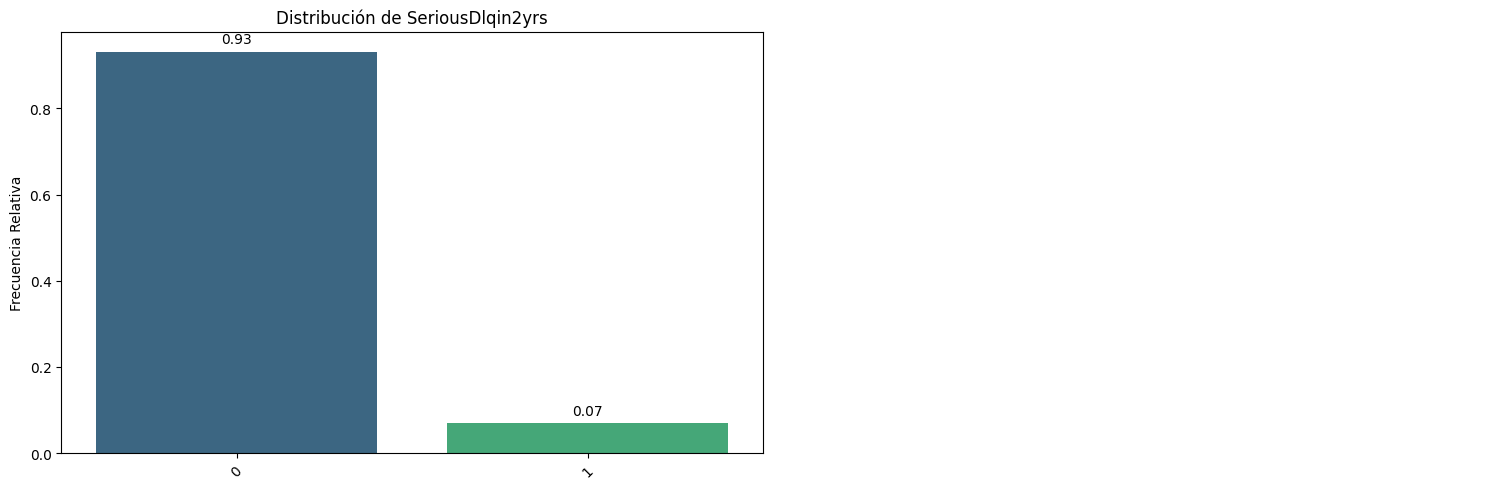

In [11]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

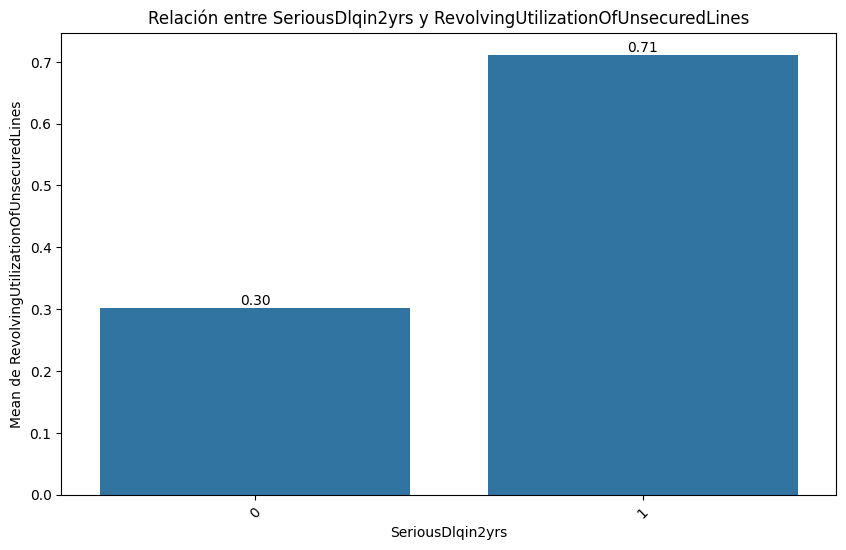

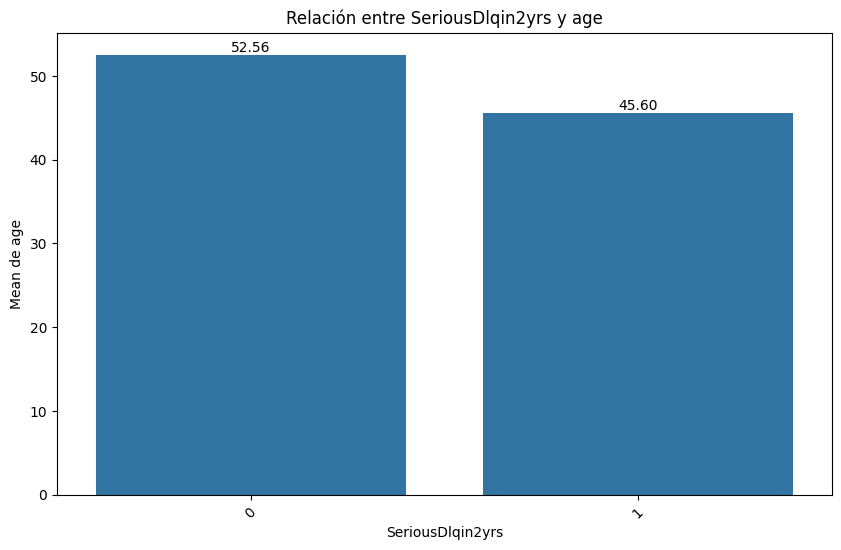

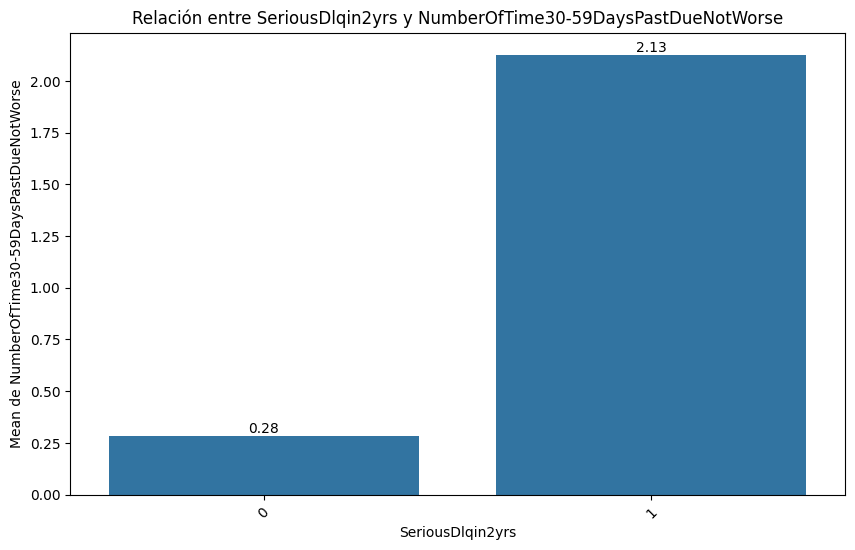

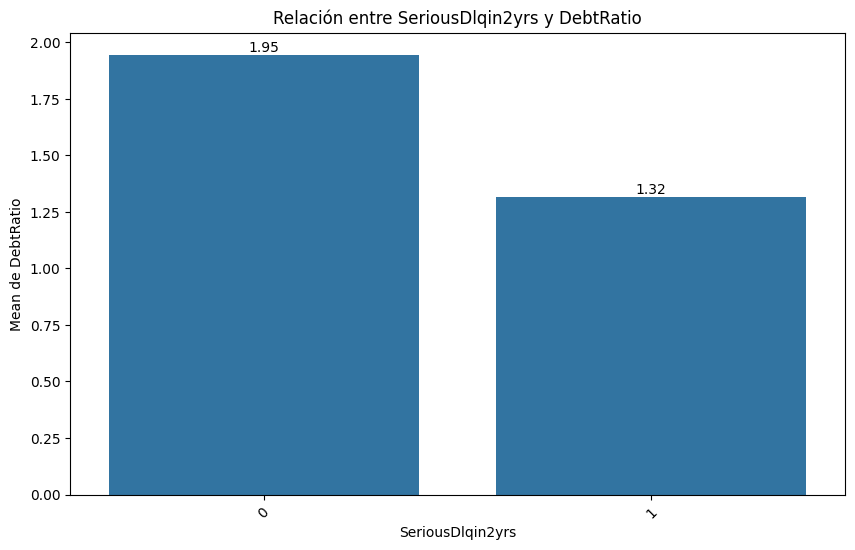

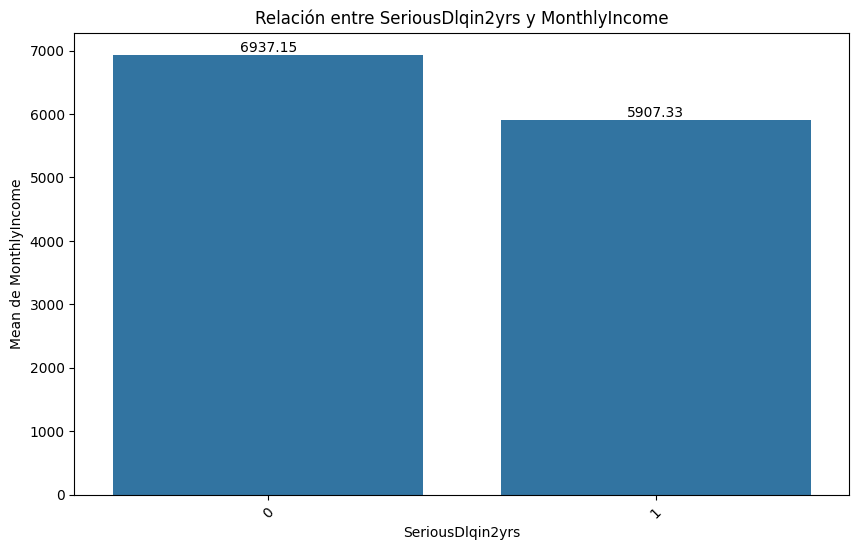

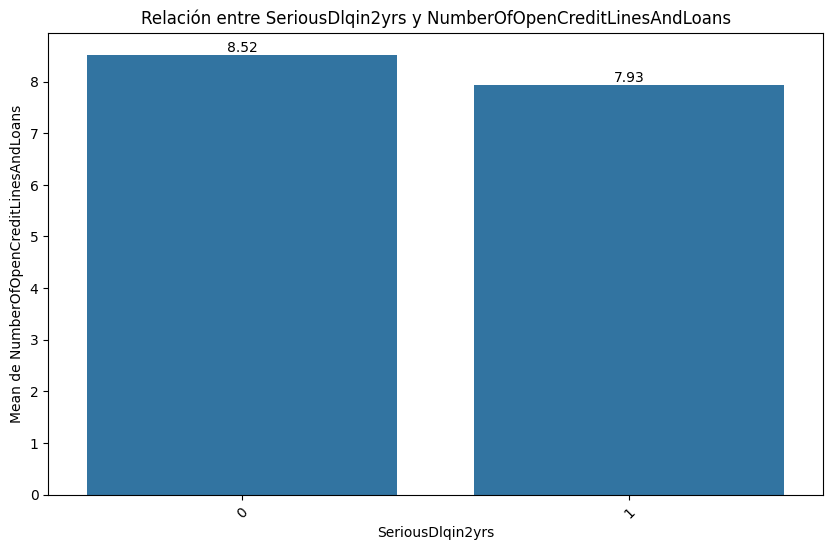

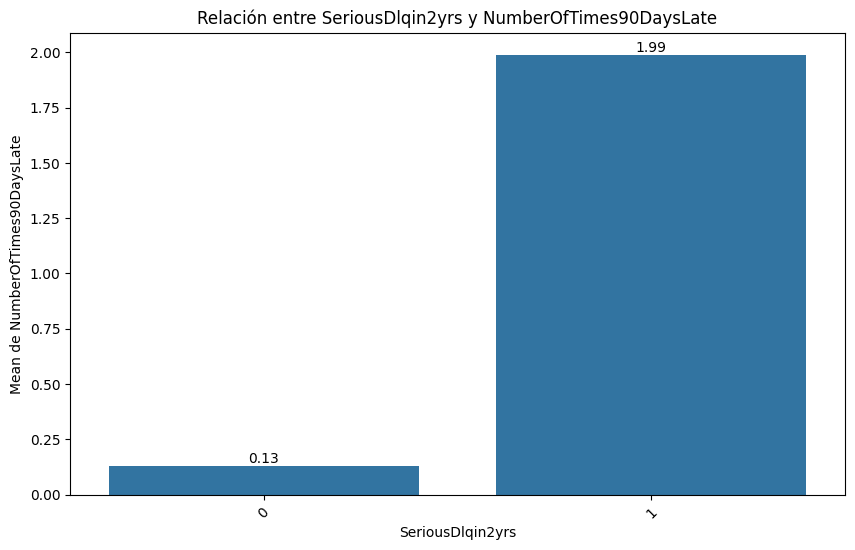

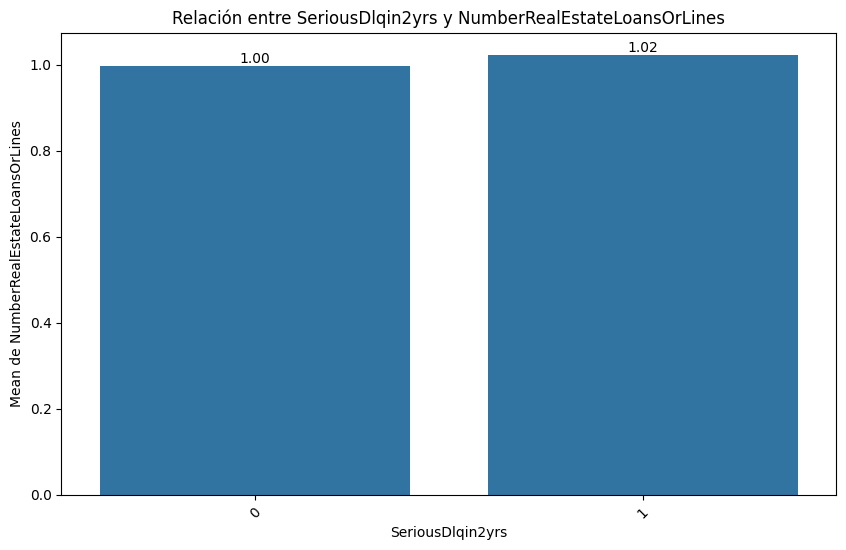

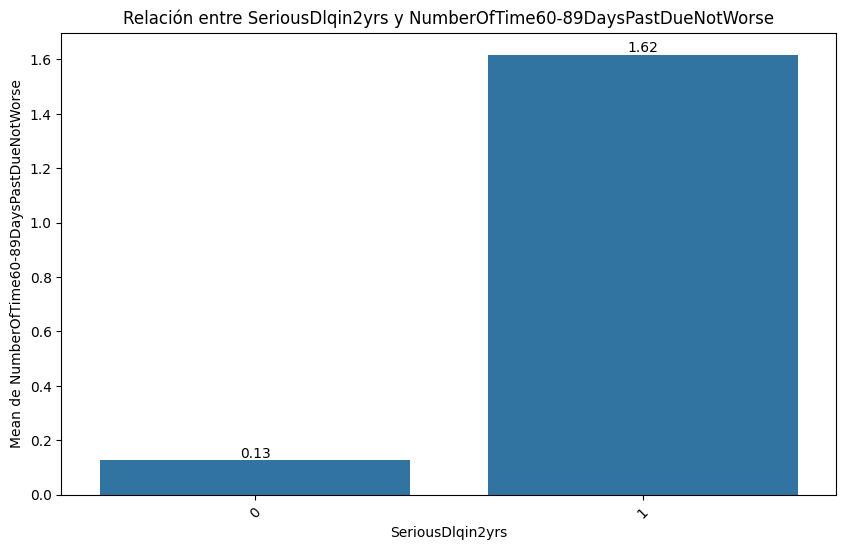

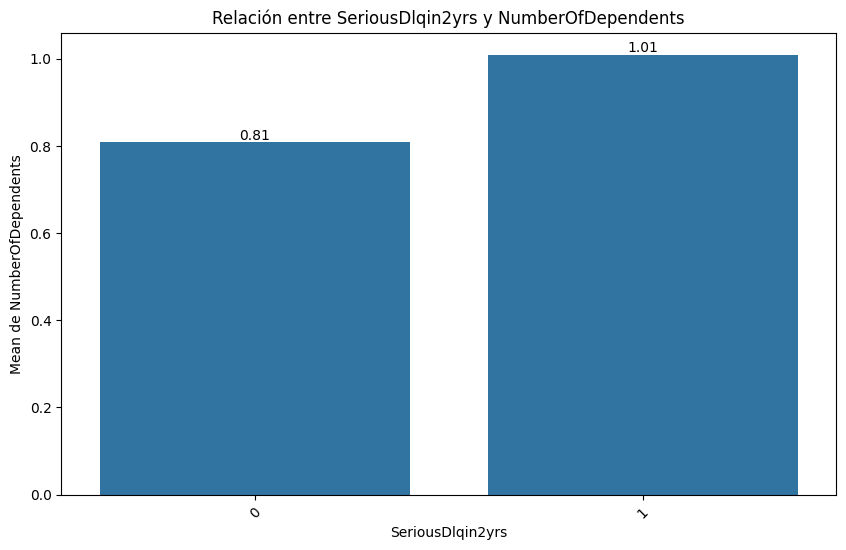

In [12]:
for col in num_features:
    bt.plot_categorical_numerical_relationship(df,target,col,show_values=True)

In [13]:
df[target].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

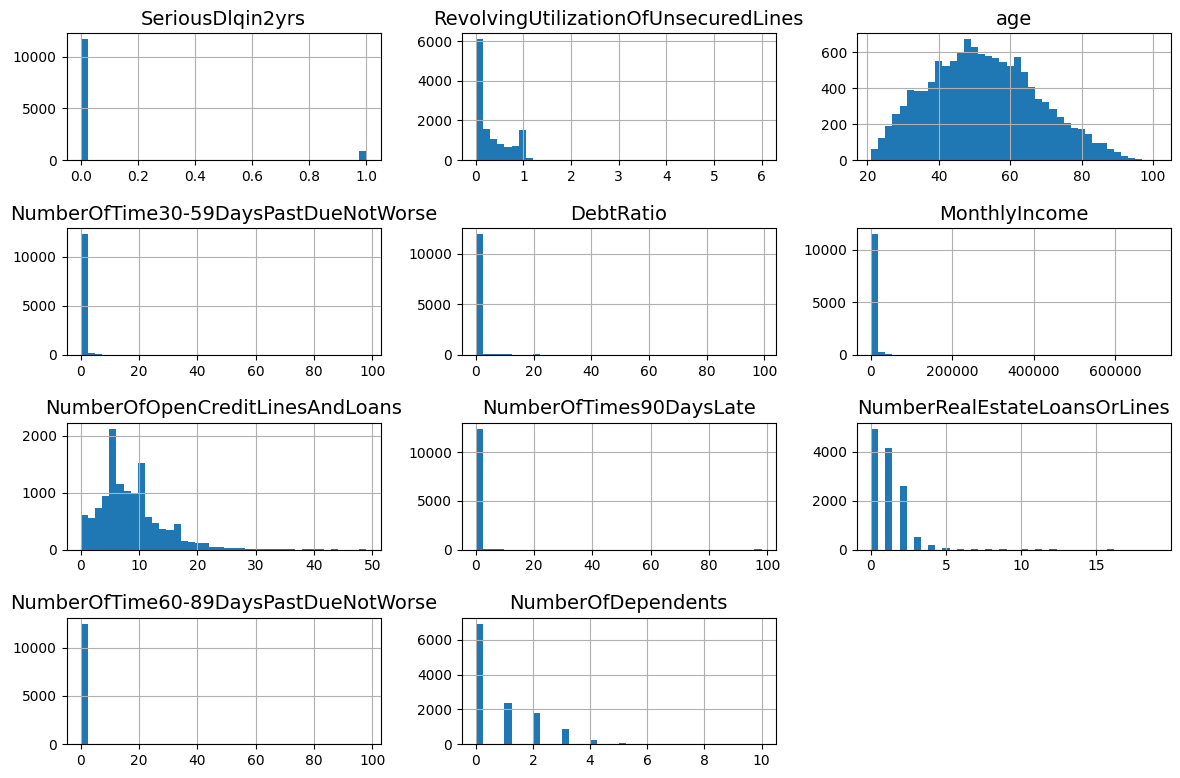

In [14]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=40, figsize=(12, 8))
plt.tight_layout()
plt.show()

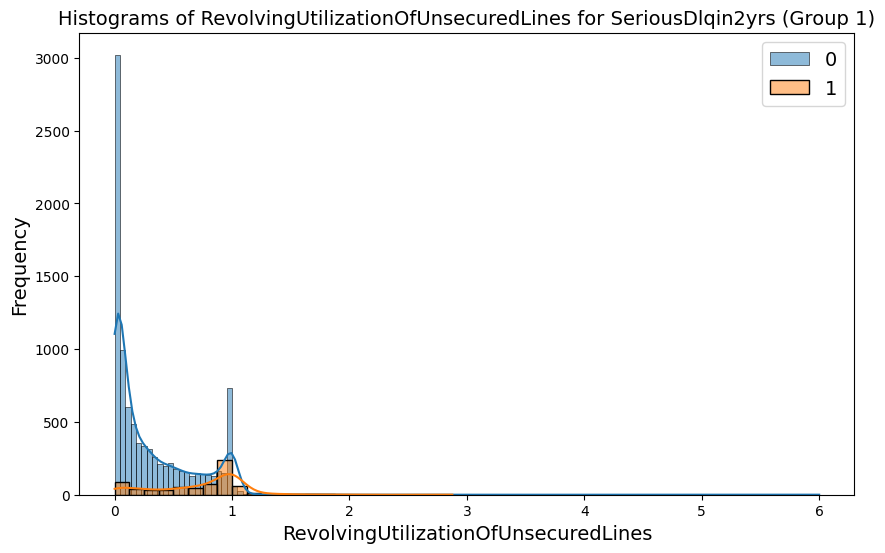

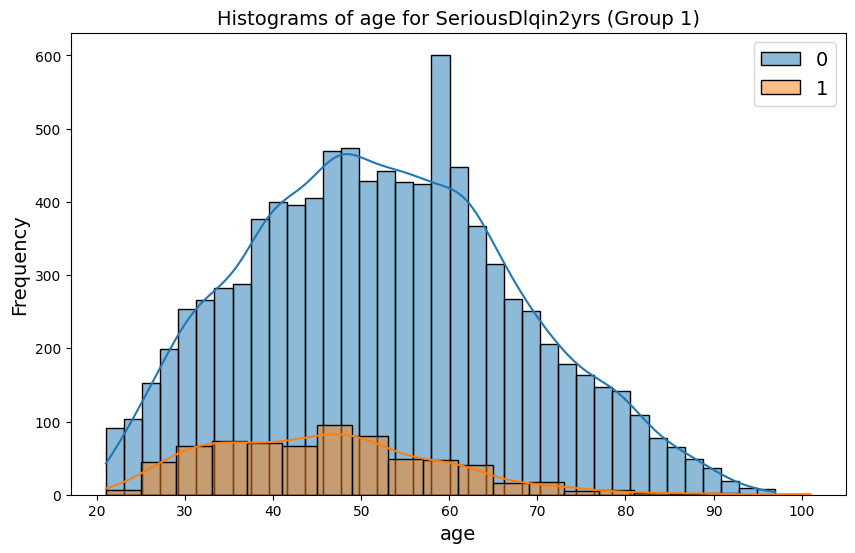

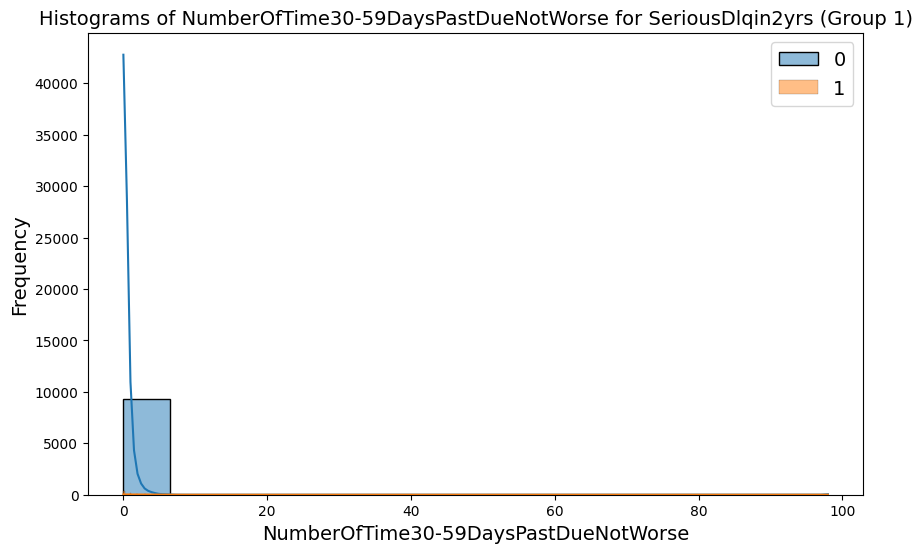

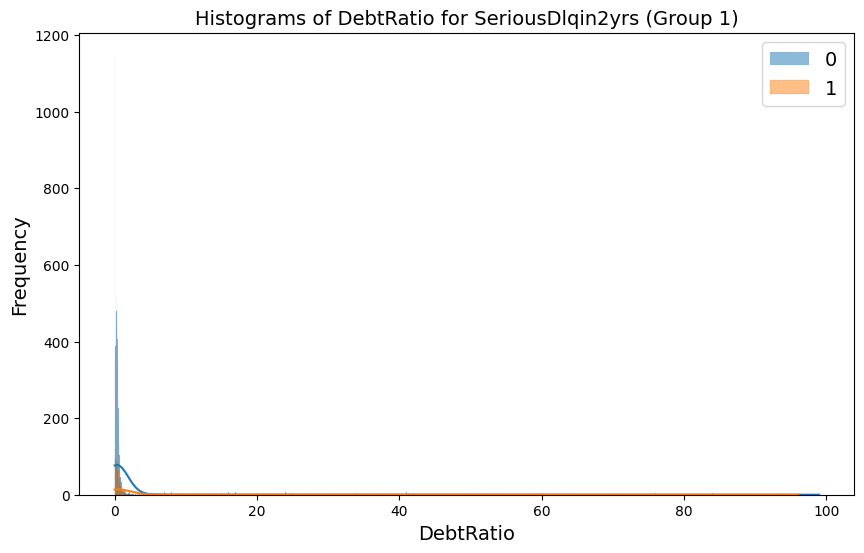

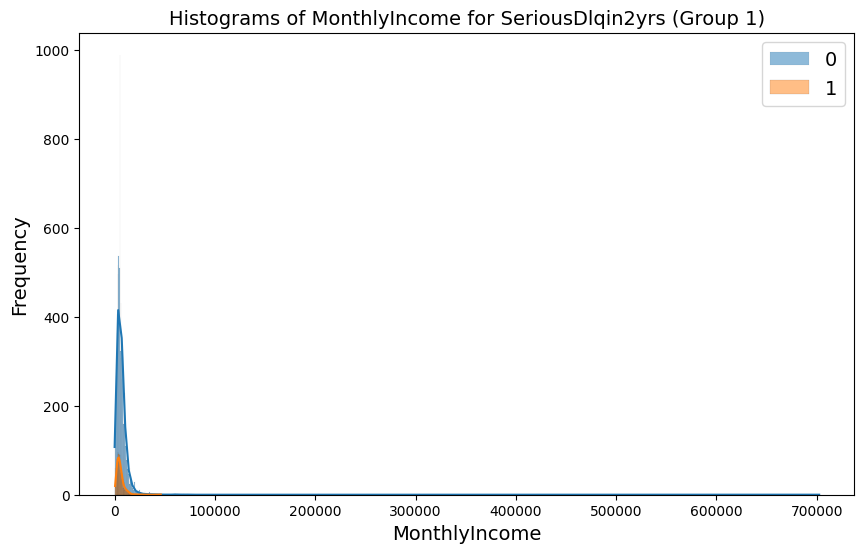

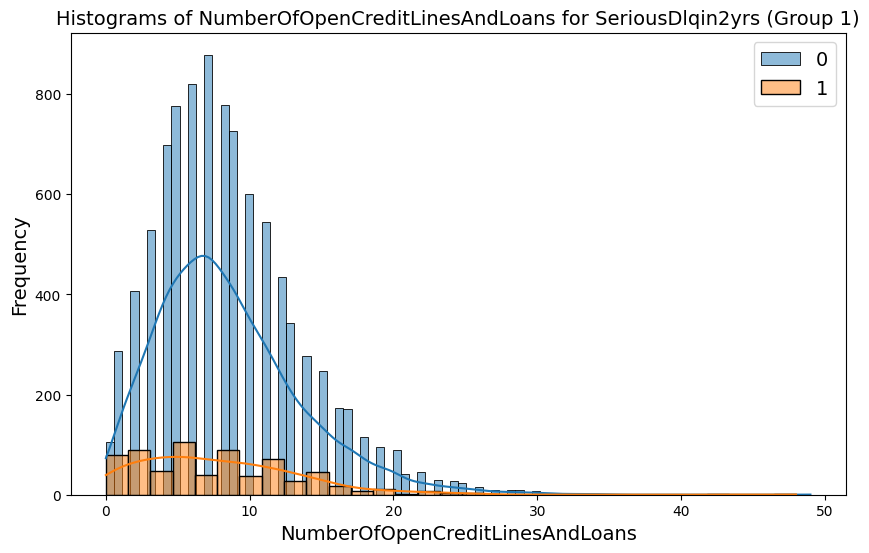

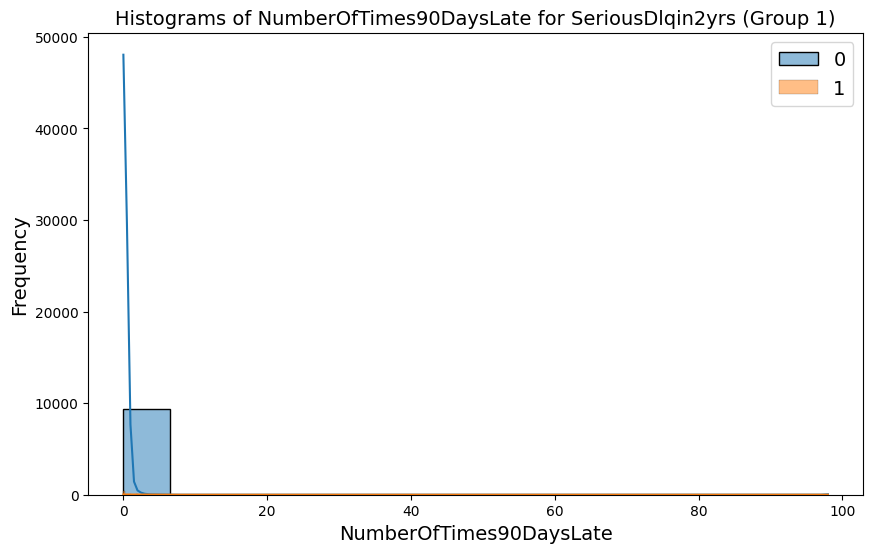

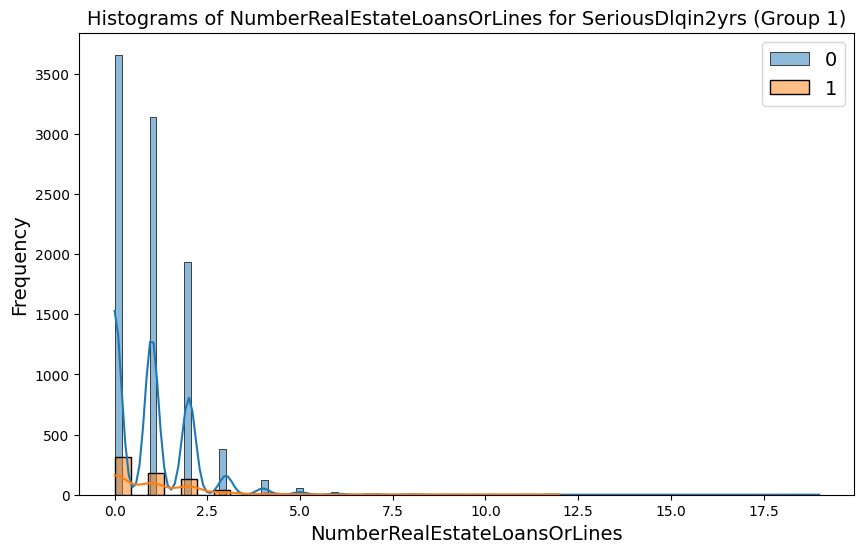

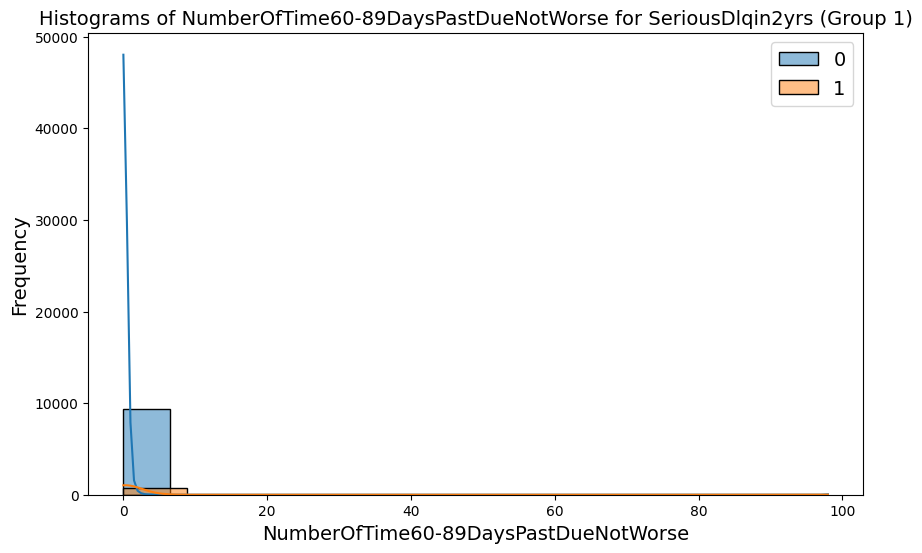

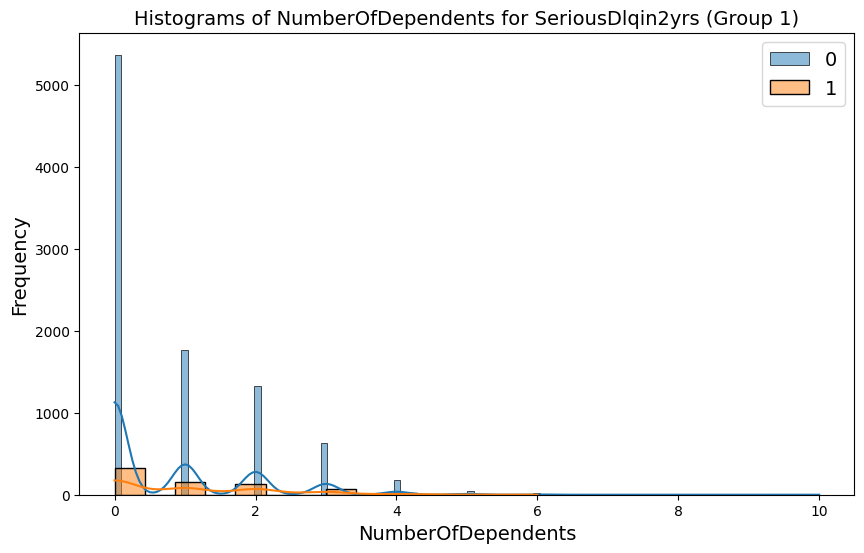

In [147]:
for col in num_features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 3)

In [15]:
df.isnull().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [16]:
# MonthlyIncome: mediana
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
# NumberOfDependents: mediana
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(df["NumberOfDependents"].median())

In [17]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

- La variable target es SeriousDlqin2yrs
- Es binaria, por tanto es un problema de clasificación binaria

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [18]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42,stratify=df["SeriousDlqin2yrs"])

In [19]:
X_train = train_set[num_features]
y_train = train_set[target]
X_test = test_set[num_features]
y_test = test_set[target]

In [20]:
#KNN

In [21]:
#escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# KNN BASE:
knn_base = KNeighborsClassifier()
knn_base.fit(X_train_scaled, y_train)

# Predecir
y_pred_knn_base = knn_base.predict(X_test_scaled)

# Evaluar
report_knn_base = classification_report(y_test, y_pred_knn_base)
print(report_knn_base)


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2335
           1       0.60      0.14      0.23       173

    accuracy                           0.93      2508
   macro avg       0.77      0.57      0.60      2508
weighted avg       0.92      0.93      0.91      2508



In [62]:
#oversampling con smote SOLO AL TRAIN
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
y_train_smote.value_counts(True) #distribución tras smote

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [152]:
y_pred_knn_smote_train = knn.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_knn_smote_train)) #smote ha funcionado

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9338
           1       0.90      0.99      0.94      9338

    accuracy                           0.94     18676
   macro avg       0.94      0.94      0.94     18676
weighted avg       0.94      0.94      0.94     18676



In [ ]:
#entreno con smote
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

y_pred_knn_smote_test = knn.predict(X_test_scaled)


report_knn_smote = classification_report(y_test, y_pred_knn_smote_test)
print(report_knn_smote)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2335
           1       0.22      0.52      0.31       173

    accuracy                           0.84      2508
   macro avg       0.59      0.69      0.61      2508
weighted avg       0.91      0.84      0.87      2508



In [76]:
#Regresión logística base

log_reg_base = LogisticRegression(max_iter=10000)#AJUSTAMOS el balanceo
log_reg_base.fit(X_train_scaled, y_train)

y_pred_log_reg_base = log_reg_base.predict(X_test_scaled)

report_log_reg_base = classification_report(y_test, y_pred_log_reg_base)
print(report_log_reg_base)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2335
           1       0.65      0.08      0.13       173

    accuracy                           0.93      2508
   macro avg       0.79      0.54      0.55      2508
weighted avg       0.92      0.93      0.91      2508



In [ ]:
# Predicción en TRAIN #el buenoe s el de arriba
y_pred_log_base_train = log_reg_base.predict(X_train_scaled)
print(classification_report(y_train, y_pred_log_base_train))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      9338
           1       0.19      0.76      0.30       691

    accuracy                           0.76     10029
   macro avg       0.58      0.76      0.58     10029
weighted avg       0.92      0.76      0.82     10029



In [75]:
#Decision Tree
tree_base = DecisionTreeClassifier(random_state=42)
tree_base.fit(X_train, y_train)
#train
y_pred_tree_base_train = tree_base.predict(X_train)
report_y_red_tree_base_train = classification_report(y_train, y_pred_tree_base_train)
print(report_y_red_tree_base_train)
#test
y_pred_tree_base = tree_base.predict(X_test)
report_tree_base = classification_report(y_test, y_pred_tree_base)
print(report_tree_base)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9338
           1       1.00      1.00      1.00       691

    accuracy                           1.00     10029
   macro avg       1.00      1.00      1.00     10029
weighted avg       1.00      1.00      1.00     10029

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2335
           1       0.26      0.27      0.26       173

    accuracy                           0.90      2508
   macro avg       0.60      0.61      0.60      2508
weighted avg       0.90      0.90      0.90      2508



In [73]:
#RandomForest
rf_base = RandomForestClassifier(random_state=42,class_weight="balanced")
rf_base.fit(X_train, y_train)

#Train
y_pred_rf_train = rf_base.predict(X_train)
report_rf_train = classification_report(y_train, y_pred_rf_train)
print(report_rf_train)

#Test
y_pred_rf_base = rf_base.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf_base)
print(report_rf)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9338
           1       0.99      1.00      1.00       691

    accuracy                           1.00     10029
   macro avg       1.00      1.00      1.00     10029
weighted avg       1.00      1.00      1.00     10029

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2335
           1       0.59      0.17      0.27       173

    accuracy                           0.93      2508
   macro avg       0.77      0.58      0.62      2508
weighted avg       0.92      0.93      0.92      2508



In [80]:
recall_knn = recall_score(y_test, y_pred_knn_base)
recall_knn_smote = recall_score(y_test, y_pred_knn_smote)
recall_log = recall_score(y_test, y_pred_log_reg_base)
recall_tree = recall_score(y_test, y_pred_tree_base)
recall_rf = recall_score(y_test, y_pred_rf_base)

print("KNN:", recall_knn)
print("LogReg:", recall_log)
print("Decision Tree:", recall_tree)
print("Random Forest:", recall_rf)

KNN: 0.13872832369942195
LogReg: 0.07514450867052024
Decision Tree: 0.27167630057803466
Random Forest: 0.17341040462427745


In [74]:
recall_knn = recall_score(y_test, y_pred_knn_base)
recall_knn_smote = recall_score(y_test, y_pred_knn_smote)
recall_log = recall_score(y_test, y_pred_log_reg_base)
recall_tree = recall_score(y_test, y_pred_tree_base)
recall_rf = recall_score(y_test, y_pred_rf_base)

print("KNN:", recall_knn)
print("KNN+SMOTE:", recall_knn_smote)
print("LogReg:", recall_log)
print("Decision Tree:", recall_tree)
print("Random Forest:", recall_rf)

KNN: 0.13872832369942195
KNN+SMOTE: 0.5202312138728323
LogReg: 0.7283236994219653
Decision Tree: 0.2543352601156069
Random Forest: 0.17341040462427745


In [88]:
#Cross validation

In [91]:
print("KNN base:", cross_val_score(knn_base, X_train_scaled, y_train, scoring='recall', cv=5).mean())
print("LogReg base:", cross_val_score(log_reg_base, X_train_scaled, y_train, scoring='recall', cv=5).mean())
print("Decision Tree base:", cross_val_score(tree_base, X_train, y_train, scoring='recall', cv=5).mean())
print("Random Forest base:", cross_val_score(rf_base, X_train, y_train, scoring='recall', cv=5).mean())

KNN base: 0.0969241997706183
LogReg base: 0.05353977687415286
Decision Tree base: 0.28658116984673127
Random Forest base: 0.1302888124283182


In [81]:
#Optimización

In [ ]:
#KNN + smote + grid

In [ ]:
knn = KNeighborsClassifier()

# Hiperparámetros a optimizar
param_knn_smote = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# GridSearch
grid_knn_smote = GridSearchCV(
    knn,
    param_knn_smote,
    scoring='recall',
    cv=5
)

grid_knn_smote.fit(X_train_smote, y_train_smote)


Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mejor recall (CV): 0.9867210734393943


In [ ]:
print("Mejores parámetros:", grid_knn_smote.best_params_)
print("Mejor recall (CV):", grid_knn_smote.best_score_)

In [87]:
best_knn_smote = grid_knn_smote.best_estimator_
y_pred_knn_smote_test = best_knn_smote.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn_smote_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2335
           1       0.22      0.54      0.31       173

    accuracy                           0.84      2508
   macro avg       0.59      0.70      0.61      2508
weighted avg       0.91      0.84      0.87      2508



In [92]:
#Regresion logistica + grid

In [ ]:
param_log = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

grid_log_reg = GridSearchCV(
    LogisticRegression(max_iter=10000),
    param_log,
    scoring='recall',
    cv=5
)

grid_log_reg.fit(X_train_scaled, y_train)

Mejor LogReg: {'C': 0.1, 'class_weight': 'balanced'}
Mejor recall (CV): 0.7525492649358774


In [ ]:

print("Mejor LogReg:", grid_log_reg.best_params_)
print("Mejor recall (CV):", grid_log_reg.best_score_)

In [94]:
best_log_reg_grid = grid_log_reg.best_estimator_
y_pred_log_reg_grid = best_log_reg_grid.predict(X_test_scaled)

print(classification_report(y_test, y_pred_log_reg_grid))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      2335
           1       0.19      0.73      0.30       173

    accuracy                           0.76      2508
   macro avg       0.58      0.75      0.58      2508
weighted avg       0.92      0.76      0.82      2508



In [95]:
#Decision Tree + grid

In [96]:
param_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_tree,
    scoring='recall',
    cv=5
)

grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [97]:
print("Mejor Decision Tree:", grid_tree.best_params_)
print("Mejor recall (CV):", grid_tree.best_score_)


Mejor Decision Tree: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor recall (CV): 0.8263476175581275


In [98]:
best_tree = grid_tree.best_estimator_
y_pred_tree_test = best_tree.predict(X_test)

print(classification_report(y_test, y_pred_tree_test))


              precision    recall  f1-score   support

           0       0.98      0.67      0.80      2335
           1       0.16      0.82      0.26       173

    accuracy                           0.68      2508
   macro avg       0.57      0.75      0.53      2508
weighted avg       0.92      0.68      0.76      2508



In [99]:
#RandomForest

In [100]:
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_rf,
    scoring='recall',
    cv=5
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [113]:
#15 min

In [101]:
print("Mejor Random Forest:", grid_rf.best_params_)
print("Mejor recall (CV):", grid_rf.best_score_)

Mejor Random Forest: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mejor recall (CV): 0.7554165363361485


In [102]:
best_rf = grid_rf.best_estimator_
y_pred_rf_test = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      2335
           1       0.20      0.74      0.32       173

    accuracy                           0.78      2508
   macro avg       0.59      0.76      0.59      2508
weighted avg       0.92      0.78      0.83      2508



In [ ]:
#Comparación

In [143]:
scores_knn = cross_val_score(knn_base, X_train_scaled, y_train, scoring='balanced_accuracy', cv=5)
scores_log = cross_val_score(log_reg_base, X_train_scaled, y_train, scoring='balanced_accuracy', cv=5)
scores_tree = cross_val_score(tree_base, X_train, y_train, scoring='balanced_accuracy', cv=5)
scores_rf = cross_val_score(rf_base, X_train, y_train, scoring='balanced_accuracy', cv=5)

In [146]:
from sklearn.metrics import balanced_accuracy_score

comparacion_bal = pd.DataFrame({
    'Modelo': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    
    'Balanced Accuracy Base (CV)': [
        scores_knn.mean(),
        scores_log.mean(),
        scores_tree.mean(),
        scores_rf.mean()
    ],
    
    'Balanced Accuracy Optimizado (CV)': [
        grid_knn_smote.best_score_,
        grid_log_reg.best_score_,
        grid_tree.best_score_,
        grid_rf.best_score_
    ],
    
    'Balanced Accuracy Test': [
        balanced_accuracy_score(y_test, y_pred_knn_smote_test),
        balanced_accuracy_score(y_test, y_pred_log_reg_grid),
        balanced_accuracy_score(y_test, y_pred_tree_test),
        balanced_accuracy_score(y_test, y_pred_rf_test)
    ]
})

print(comparacion_bal)

                Modelo  Balanced Accuracy Base (CV)  \
0                  KNN                     0.544500   
1  Logistic Regression                     0.525057   
2        Decision Tree                     0.613199   
3        Random Forest                     0.561664   

   Balanced Accuracy Optimizado (CV)  Balanced Accuracy Test  
0                           0.986721                0.700584  
1                           0.752549                0.745532  
2                           0.826348                0.745951  
3                           0.755417                0.762448  


In [ ]:
scores_knn = cross_val_score(knn_base, X_train_scaled, y_train, scoring='recall', cv=5)
scores_log = cross_val_score(log_reg_base, X_train_scaled, y_train, scoring='recall', cv=5)
scores_tree = cross_val_score(tree_base, X_train, y_train, scoring='recall', cv=5)
scores_rf = cross_val_score(rf_base, X_train, y_train, scoring='recall', cv=5)

In [142]:
comparacion = pd.DataFrame({
    'Modelo': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    
    'Recall Base (CV)': [
        scores_knn.mean(),
        scores_log.mean(),
        scores_tree.mean(),
        scores_rf.mean()
    ],
    
    'Recall Optimizado (CV)': [
        grid_knn_smote.best_score_,
        grid_log_reg.best_score_,
        grid_tree.best_score_,
        grid_rf.best_score_
    ],
    
    'Recall Test': [
        recall_score(y_test, y_pred_knn_smote_test),
        recall_score(y_test, y_pred_log_reg_grid),
        recall_score(y_test, y_pred_tree_test),
        recall_score(y_test, y_pred_rf_test)
    ]
})

print(comparacion)

                Modelo  Recall Base (CV)  Recall Optimizado (CV)  Recall Test
0                  KNN          0.096924                0.986721     0.543353
1  Logistic Regression          0.053540                0.752549     0.728324
2        Decision Tree          0.286581                0.826348     0.820809
3        Random Forest          0.130289                0.755417     0.739884


In [ ]:
#Voy a hacer Boosting en DecisionTree con AdaBoost

In [118]:
param_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=42
)

grid_ada = GridSearchCV(
    ada,
    param_ada,
    scoring='recall',
    cv=5
)

grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [119]:
print("Mejor AdaBoost:", grid_ada.best_params_)
print("Mejor recall (CV):", grid_ada.best_score_)

Mejor AdaBoost: {'learning_rate': 0.01, 'n_estimators': 200}
Mejor recall (CV): 0.2836617662391826


In [120]:
best_ada = grid_ada.best_estimator_
y_pred_ada_test = best_ada.predict(X_test)

print(classification_report(y_test, y_pred_ada_test))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2335
           1       0.36      0.27      0.31       173

    accuracy                           0.92      2508
   macro avg       0.65      0.62      0.63      2508
weighted avg       0.91      0.92      0.91      2508



In [121]:
#ESTE NO VALE

In [122]:
#GradientBoostingClassifier

In [124]:
param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gb = GradientBoostingClassifier(random_state=42)

grid_gb = GridSearchCV(
    gb,
    param_gb,
    scoring='recall',
    cv=5
)

grid_gb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [125]:
print("Mejor Gradient Boosting:", grid_gb.best_params_)
print("Mejor recall (CV):", grid_gb.best_score_)


Mejor Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor recall (CV): 0.23157126472734854


In [126]:
best_gb = grid_gb.best_estimator_
y_pred_gb_test = best_gb.predict(X_test)

print(classification_report(y_test, y_pred_gb_test))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2335
           1       0.55      0.22      0.31       173

    accuracy                           0.93      2508
   macro avg       0.75      0.60      0.64      2508
weighted avg       0.92      0.93      0.92      2508



In [127]:
#XGBoost

In [128]:
scale = len(y_train[y_train==0]) / len(y_train[y_train==1])
print(scale)

13.513748191027496


In [130]:
param_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [scale]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    tree_method='hist'
)

grid_xgb = GridSearchCV(
    xgb,
    param_xgb,
    scoring='recall',
    cv=5
)

grid_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [13.513748191027496],
                         'subsample': [0.8, 1]},
             scoring='recall')

In [131]:

print("Mejor XGBoost:", grid_xgb.best_params_)
print("Mejor recall (CV):", grid_xgb.best_score_)


Mejor XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 13.513748191027496, 'subsample': 0.8}
Mejor recall (CV): 0.8017516421645293


In [133]:
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2335
           1       0.18      0.77      0.29       173

    accuracy                           0.74      2508
   macro avg       0.58      0.75      0.56      2508
weighted avg       0.92      0.74      0.80      2508



In [134]:
#LightGBM

In [137]:
param_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [-1, 3, 5],
    'num_leaves': [15, 31, 63],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'class_weight': ['balanced']
}

lgb = LGBMClassifier(
    random_state=42
)

grid_lgb = GridSearchCV(
    lgb,
    param_lgb,
    scoring='recall',
    cv=5
)

grid_lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 553, number of negative: 7470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 8023, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000
[LightGBM] [Info] Start training from score 0,000000
[LightGBM] [Info] Number of positive: 553, number of negative: 7470
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 8023, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000
[LightGBM] [Inf

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [-1, 3, 5],
                         'n_estimators': [100, 200], 'num_leaves': [15, 31, 63],
                         'subsample': [0.8, 1]},
             scoring='recall')

In [138]:
print("Mejor LightGBM:", grid_lgb.best_params_)
print("Mejor recall (CV):", grid_lgb.best_score_)

Mejor LightGBM: {'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15, 'subsample': 0.8}
Mejor recall (CV): 0.8003023668022105


In [139]:
best_lgb = grid_lgb.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)

print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      2335
           1       0.19      0.79      0.30       173

    accuracy                           0.75      2508
   macro avg       0.58      0.77      0.57      2508
weighted avg       0.92      0.75      0.81      2508



In [ ]:
#Ninguno es mejor que el DecisionTree optimizado, se le acerca la optimizacion con LightGBM